In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, trim_mean
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import QuantileTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)
from sklearn.pipeline import Pipeline
import warnings


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Dataset Features: 



The mushroom datasetconsists of 21 features, including a target variable labeled "class." 

1. **Class (Target Variable)**:
   - **Type:** `object`
   - **Description:** This is the classification label indicating whether the mushroom is edible or poisonous. Typically, it could have values like 'edible' or 'poisonous'.

2. **Cap Diameter**:
   - **Type:** `float64`
   - **Description:** This numerical feature represents the diameter of the mushroom's cap, usually measured in centimeters.

3. **Cap Shape**:
   - **Type:** `object`
   - **Description:** Categorical feature that describes the shape of the mushroom cap. Common shapes might include 'bell', 'conical', 'convex', 'flat', etc.

4. **Cap Surface**:
   - **Type:** `object`
   - **Description:** Describes the texture or surface characteristics of the cap. Possible values might include 'smooth', 'scaly', 'fibrous', etc.

5. **Cap Color**:
   - **Type:** `object`
   - **Description:** The color of the mushroom cap. This is a categorical variable with possible values like 'brown', 'red', 'yellow', etc.

6. **Does Bruise or Bleed**:
   - **Type:** `object`
   - **Description:** Indicates whether the mushroom bruises or bleeds when handled or damaged. This is a binary categorical variable, often with values like 'yes' or 'no'.

7. **Gill Attachment**:
   - **Type:** `object`
   - **Description:** Describes how the gills are attached to the mushroom stem. Possible categories include 'attached', 'free', 'notched', etc.

8. **Gill Spacing**:
   - **Type:** `object`
   - **Description:** Indicates the spacing between the gills. Typical values might be 'close', 'crowded', or 'distant'.

9. **Gill Color**:
   - **Type:** `object`
   - **Description:** The color of the gills underneath the mushroom cap. This is a categorical variable with values like 'brown', 'gray', 'white', etc.

10. **Stem Height**:
    - **Type:** `float64`
    - **Description:** A numerical feature representing the height of the mushroom stem, usually measured in centimeters.

11. **Stem Width**:
    - **Type:** `float64`
    - **Description:** The width or diameter of the stem, typically measured in centimeters. This is a numerical feature.

12. **Stem Root**:
    - **Type:** `object`
    - **Description:** Describes the type of root or base of the mushroom stem. Categories could include 'bulbous', 'club', 'equal', 'rooted', etc.

13. **Stem Surface**:
    - **Type:** `object`
    - **Description:** The surface texture of the stem. Possible values could be 'smooth', 'fibrous', 'silky', etc.

14. **Stem Color**:
    - **Type:** `object`
    - **Description:** The color of the mushroom stem, a categorical feature with possible values like 'brown', 'yellow', 'red', etc.

15. **Veil Type**:
    - **Type:** `object`
    - **Description:** Describes the type of veil (a thin membrane that covers the gills in immature mushrooms). This might be a constant value since many mushrooms only have one type of veil.

16. **Veil Color**:
    - **Type:** `object`
    - **Description:** The color of the veil. It might have values such as 'white', 'yellow', etc.

17. **Has Ring**:
    - **Type:** `object`
    - **Description:** Indicates whether the mushroom has a ring around the stem, usually near the top. This is a binary categorical variable, typically 'yes' or 'no'.

18. **Ring Type**:
    - **Type:** `object`
    - **Description:** If the mushroom has a ring, this describes its type. Common types include 'flaring', 'large', 'none', etc.

19. **Spore Print Color**:
    - **Type:** `object`
    - **Description:** The color of the spore print, which is a powdery deposit obtained by allowing spores of the mushroom to fall onto a surface. Typical values could be 'brown', 'black', 'white', etc.

20. **Habitat**:
    - **Type:** `object`
    - **Description:** The type of environment where the mushroom is typically found. Possible values might include 'woods', 'grasses', 'meadows', etc.

21. **Season**:
    - **Type:** `object`
    - **Description:** The season during which the mushroom is typically found. Values might include 'spring', 'summer', 'autumn', etc.

# Exploratory Data Analysis

In [2]:
submission = pd.read_csv('sample_submission.csv')

In [3]:
train = pd.read_csv('train.csv')
print(f'train shape: {train.shape}')

train shape: (3116945, 22)


In [4]:
test = pd.read_csv('test.csv')
print(f'test shape: {test.shape}')

test shape: (2077964, 21)


In [5]:
print('train info:')
print('==========================================')
print(train.info())
print('==========================================')
print('test info:')
print('==========================================')
print(test.info())

train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), objec

In [6]:
train = train.drop(columns=['id'], axis=1)
test = test.drop(columns=['id'], axis=1)

In [7]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [8]:
test.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3116941.0,6.309848,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,11.153785,8.095477,0.00,4.97,9.65,15.63,102.90


In [10]:
train.describe(include='object').T

,count,unique,top,freq
class,3116945,2,p,1705396
cap-shape,3116905,74,x,1436026
cap-surface,2445922,83,t,460777
cap-color,3116933,78,n,1359542
does-bruise-or-bleed,3116937,26,f,2569743
gill-attachment,2593009,78,a,646034
gill-spacing,1858510,48,c,1331054
gill-color,3116888,63,w,931538
stem-root,359922,38,b,165801
stem-surface,1136084,60,s,327610


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,2077957.0,6.306192,4.685462,0.0,3.31,5.74,8.23,607.00
stem-height,2077963.0,6.346509,2.698978,0.0,4.67,5.88,7.41,57.29
stem-width,2077964.0,11.148374,8.100181,0.0,4.97,9.64,15.62,102.91


In [12]:
test.describe(include='object').T

,count,unique,top,freq
cap-shape,2077933,62,x,957949
cap-surface,1631060,59,t,306852
cap-color,2077951,57,n,904307
does-bruise-or-bleed,2077954,22,f,1713662
gill-attachment,1728143,66,a,430960
gill-spacing,1238369,35,c,886976
gill-color,2077915,56,w,620773
stem-root,239952,31,b,110581
stem-surface,756476,54,s,218496
stem-color,2077943,55,w,797365


# Handling Null Values

In [13]:
print(f'Number of null values in train:\n-----------\n{train.isna().sum()}')
print('=======================================')
print(f'Number of null values in test:\n-----------\n{test.isna().sum()}')

Number of null values in train:
-----------
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64
Number of null values in test:
-----------
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill

In [14]:
print(f'Total Number of Null Values in Train Set: {train.isna().sum().sum()}')
print(f'Total Number of Null Values in Test Set: {test.isna().sum().sum()}')

Total Number of Null Values in Train Set: 15868508
Total Number of Null Values in Test Set: 10579477


In [15]:
missing_train = train.isnull().mean() * 100
missing_test = test.isnull().mean() * 100

print("Columns in Train set with more than 85% missing values:")
print(missing_train[missing_train > 85])

print("\nColumns in Test set with more than 85% missing values:")
print(missing_test[missing_test > 85])

Columns in Train set with more than 85% missing values:
stem-root            88.452732
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64

Columns in Test set with more than 85% missing values:
stem-root            88.452543
veil-type            94.878689
veil-color           87.880445
spore-print-color    91.417224
dtype: float64


In [16]:
#Drop columns whch has more than 85 percent missing values

cols_to_drop_train = missing_train[missing_train > 85].index
cols_to_drop_test = missing_test[missing_test > 85].index

train = train.drop(columns= cols_to_drop_train, axis= 1)
test = test.drop(columns= cols_to_drop_test, axis= 1)

print(f'Train Set Shape: {train.shape}')
print(f'Test Set Shape: {test.shape}')

Train Set Shape: (3116945, 17)
Test Set Shape: (2077964, 16)


In [17]:
print(f'Number of Duplicated Values in Train Set: {train.duplicated().sum()}')
print(f'Number of Duplicated Values in test Set: {test.duplicated().sum()}')

Number of Duplicated Values in Train Set: 157
Number of Duplicated Values in test Set: 85


In [1]:
#Drop Duplicated Values

train.drop_duplicates()
print(f'train set shape: {train.shape}')

test.drop_duplicates()
print(f'test set shape: {test.shape}')

NameError: name 'train' is not defined

# Dive into Categorical Features

In [19]:
#Unique Values in Train set:

#for col in train.describe(include='object').columns:
    #print(f'Column name:\n=========================')
    #print(train[col].value_counts())

In [20]:
#Unique Values in Test set:

#for col in test.describe(include='object').columns:
    #print(f'Column name:\n=========================')
    #print(test[col].value_counts())

# Clean messy categoric features

In [21]:
def replace_non_alpha_with_nan(df):
    cols_to_filter = ['cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-surface', 'stem-color', 'has-ring','ring-type', 'habitat']
    
    alphabet_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    
    def filter_alpha(value):
        if isinstance(value, str):
            return value if len(value) == 1 and value in alphabet_list else np.nan
        return np.nan

    for col in cols_to_filter:
        df[col] = df[col].apply(filter_alpha)
    
    return df

In [22]:
train = replace_non_alpha_with_nan(train)
test = replace_non_alpha_with_nan(test)

In [23]:
#for col in train.describe(include='object').columns:
    #print(f'Column name: {col}\n=========================')
    #print(len(set(train[col])), '\n')

In [24]:
#for col in test.describe(include='object').columns:
    #print(f'Column name: {col}\n=========================')
    #print(len(set(test[col])),'\n')

# Visualization

# **Target**

In [25]:
train['class'].unique()

array(['e', 'p'], dtype=object)

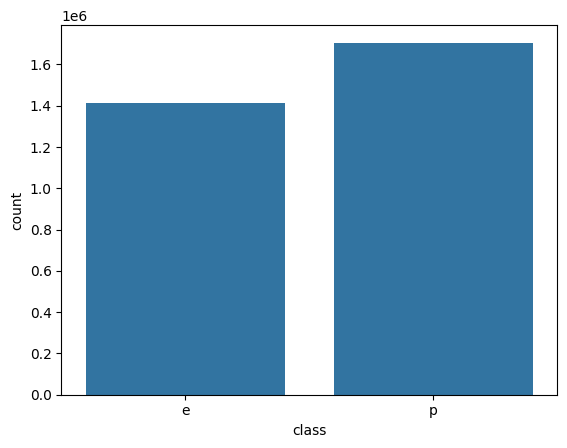

In [26]:
sns.countplot(data=train, x='class');

# **Category**

# Train Set

In [27]:
cat_cols = [col for col in train.select_dtypes('object').columns if col!='class']
num_cols = [col for col in train.select_dtypes('number').columns]
print(f'Categorical columns:\n {cat_cols}\n')
print(f'Numeric columns:\n {num_cols}')

Categorical columns:
 ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

Numeric columns:
 ['cap-diameter', 'stem-height', 'stem-width']


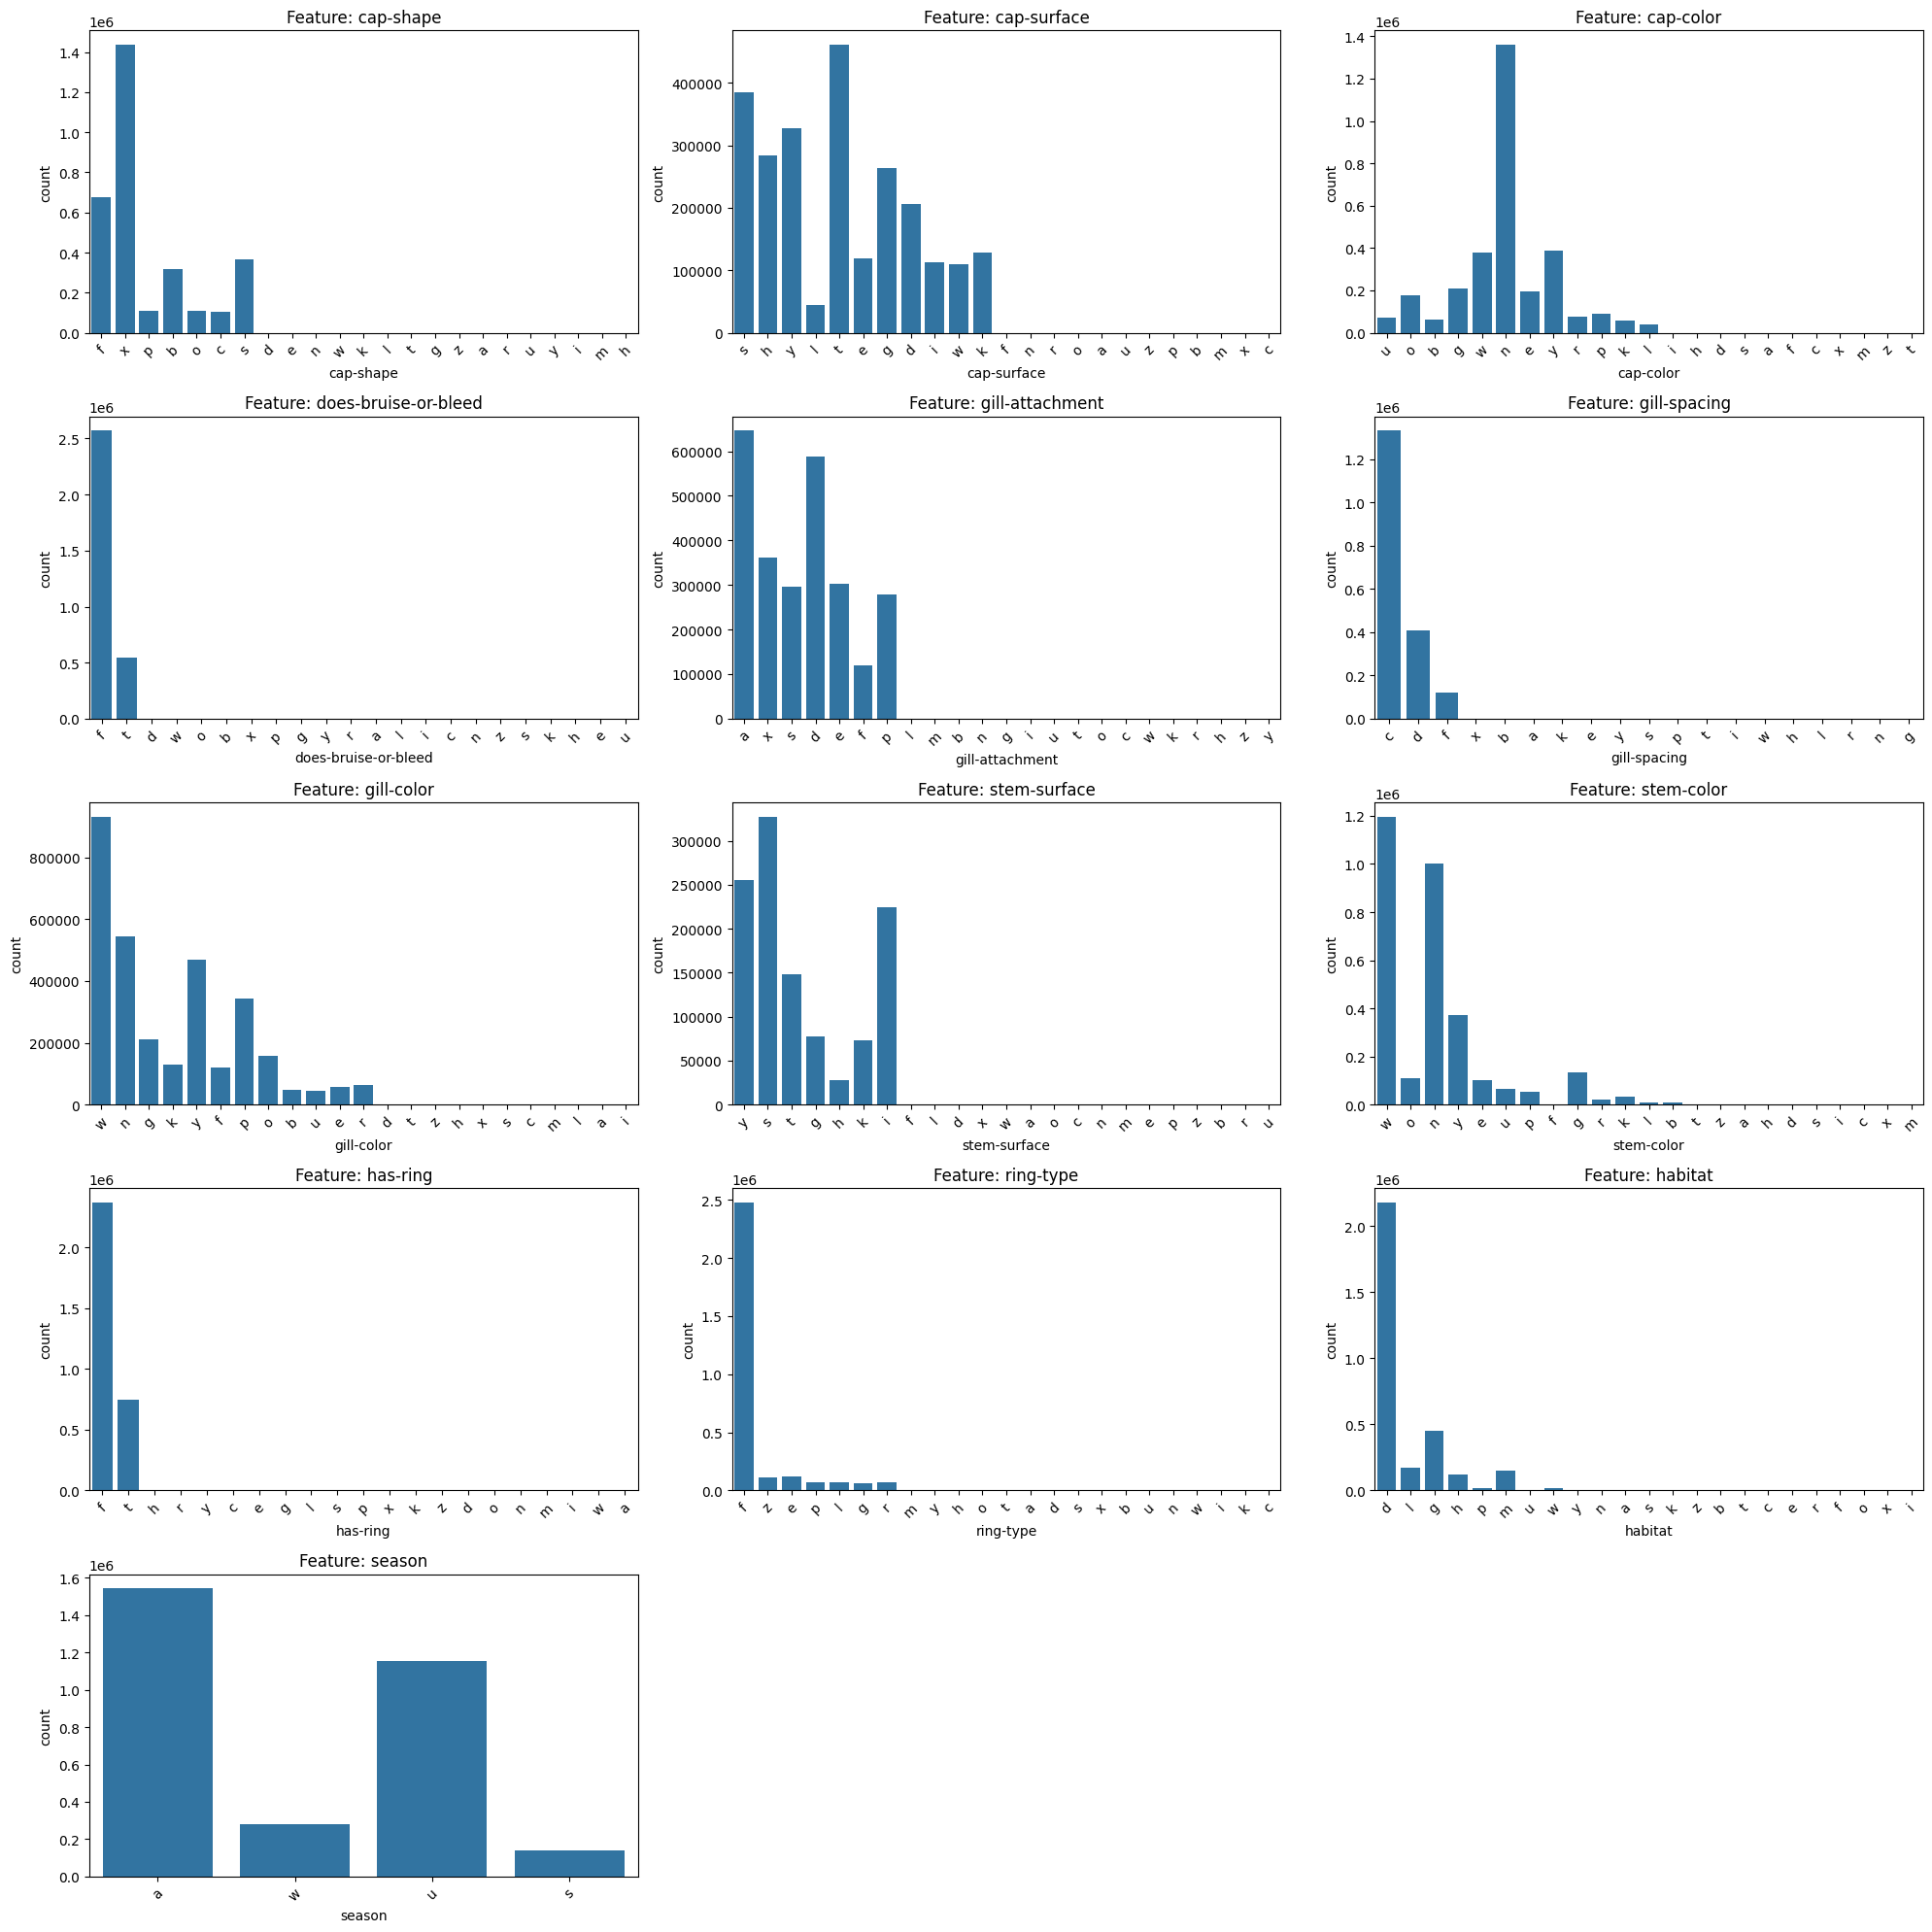

<Figure size 1280x960 with 0 Axes>

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols): 
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f'Feature: {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.figure(dpi=200)
plt.show()

# Test set

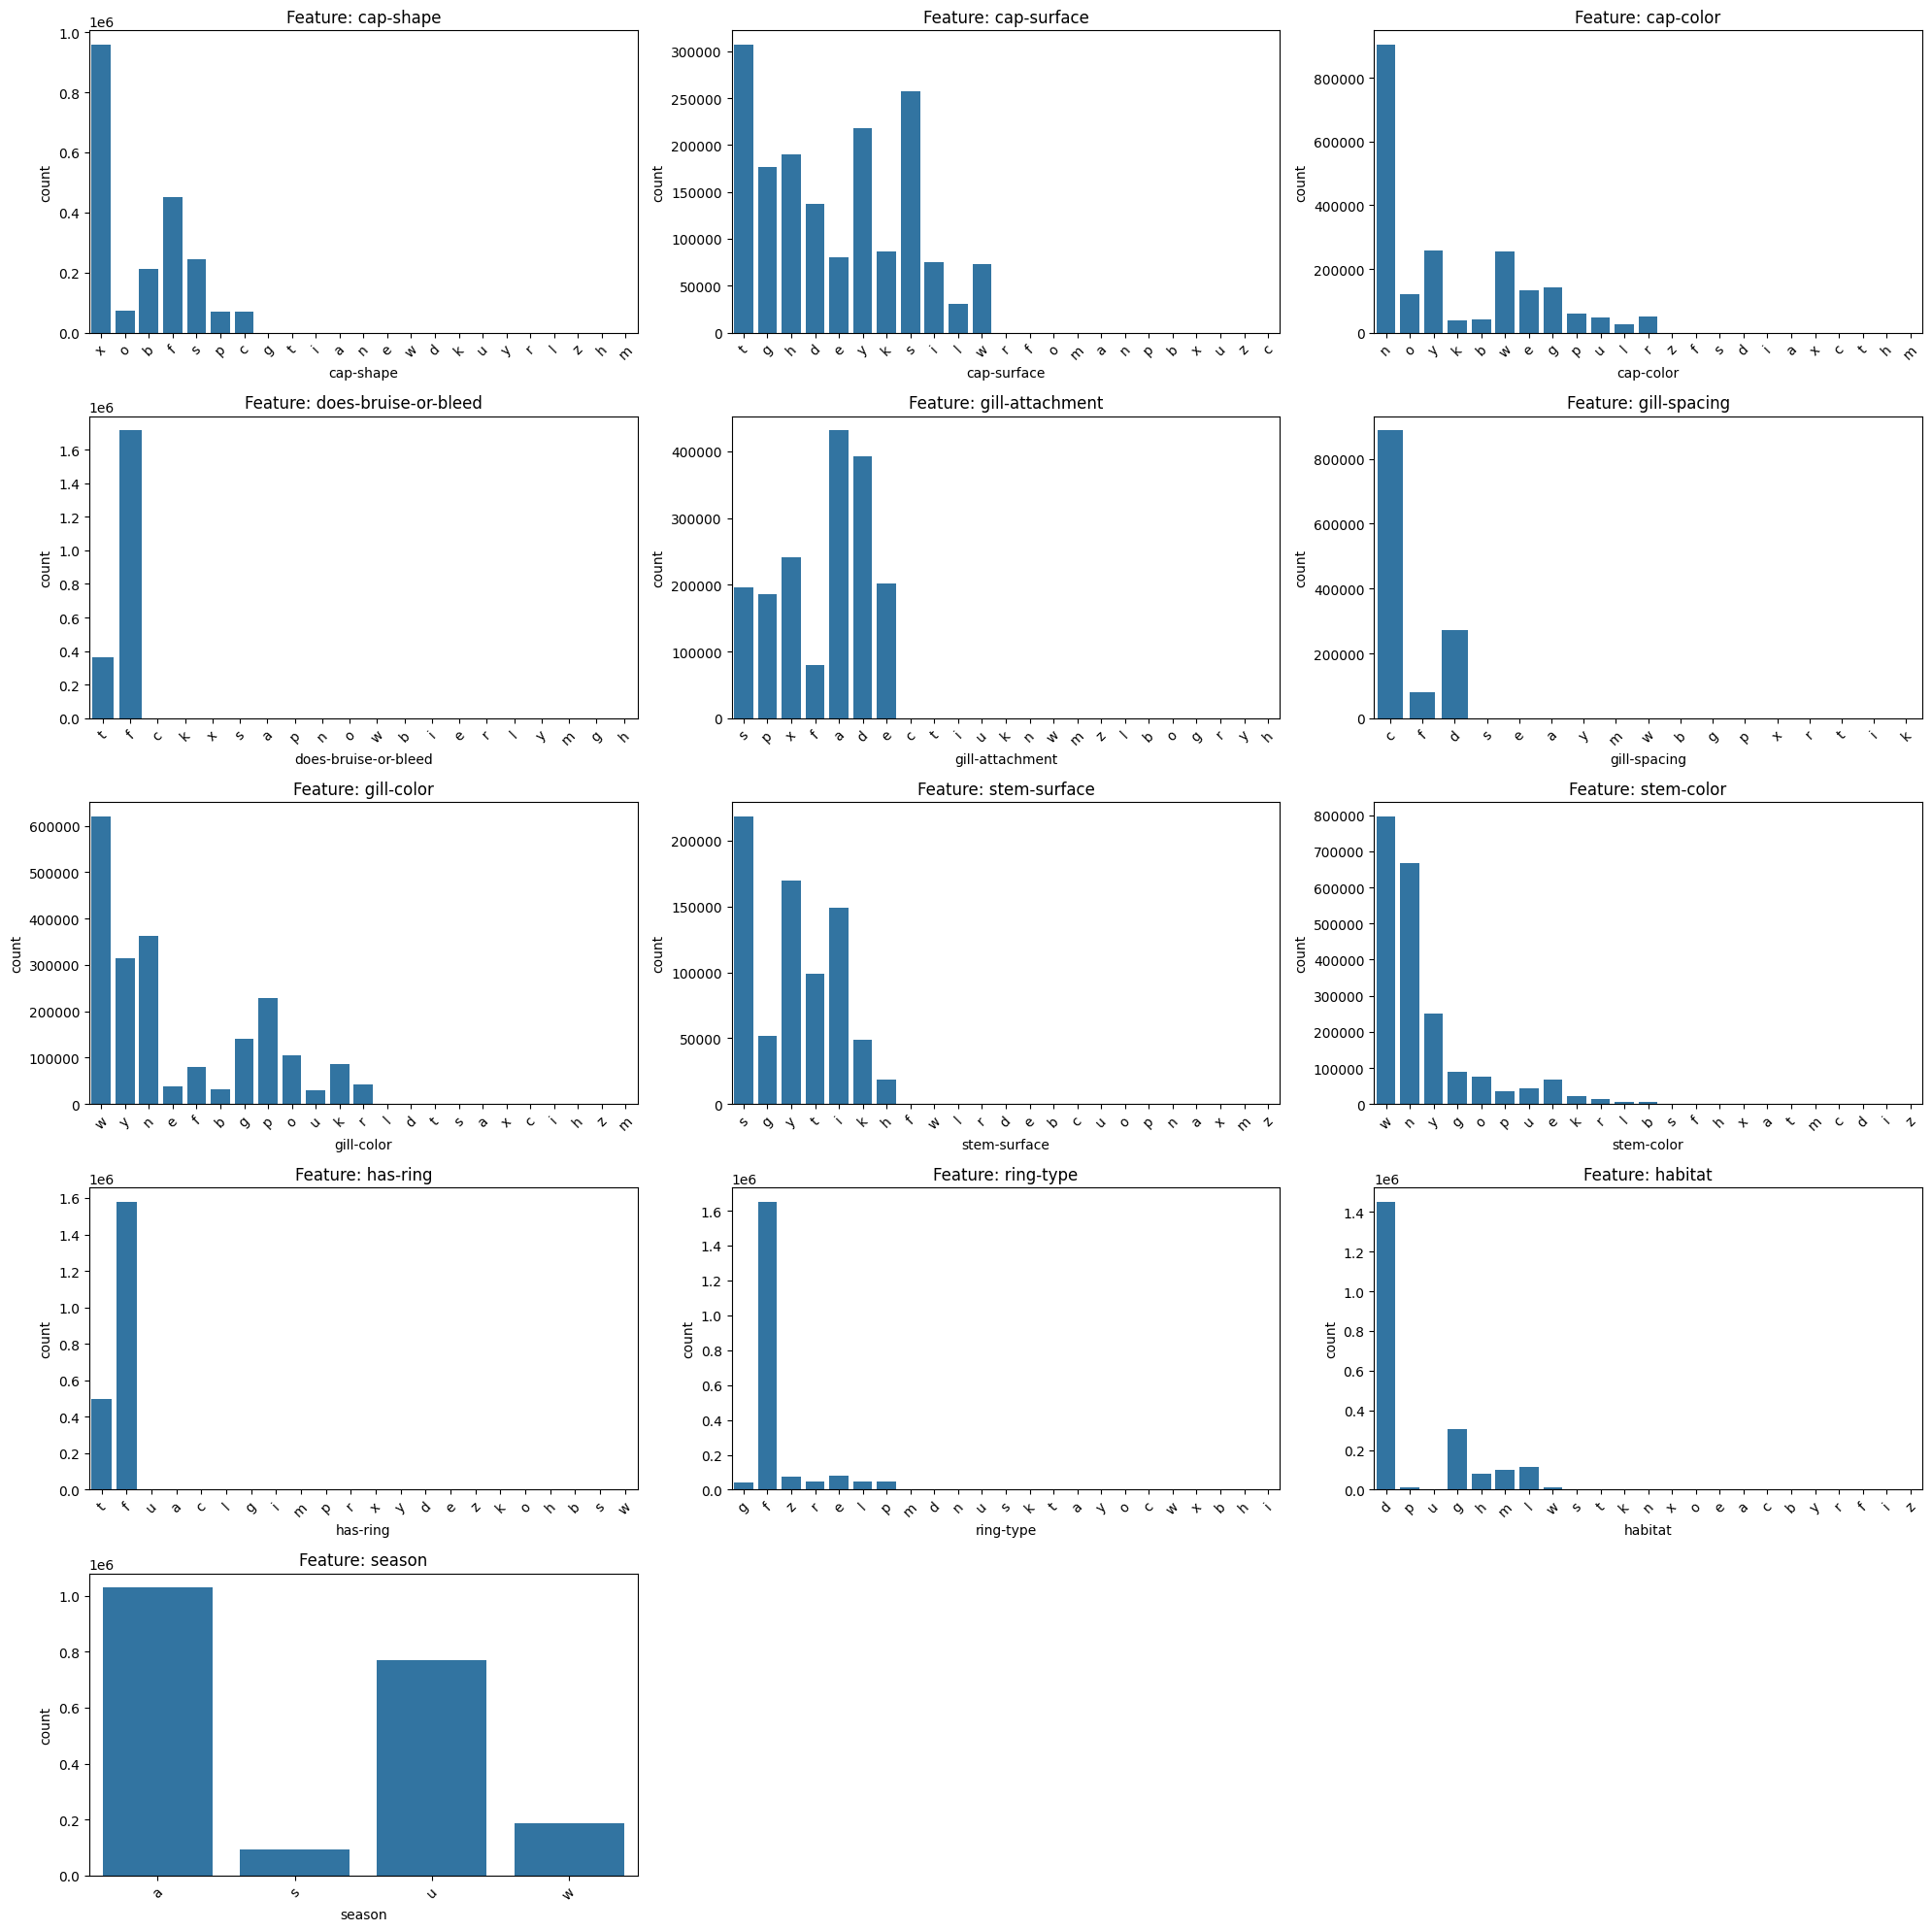

<Figure size 1280x960 with 0 Axes>

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols): 
    sns.countplot(data=test, x=col, ax=axes[i])
    axes[i].set_title(f'Feature: {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.figure(dpi=200)
plt.show()

# Numeric Features

# Train Set

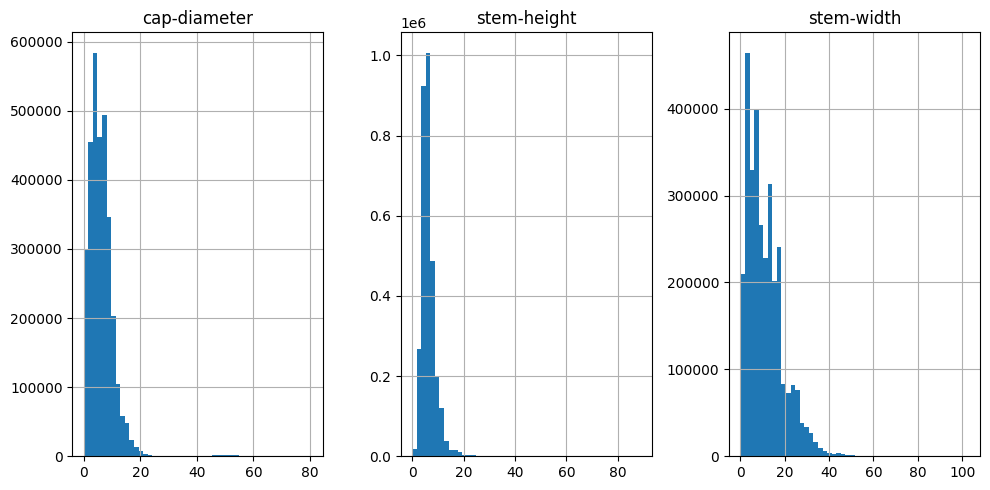

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for ax, col in zip(axes, num_cols):
    train[col].hist(bins= 50, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<Figure size 1280x960 with 0 Axes>

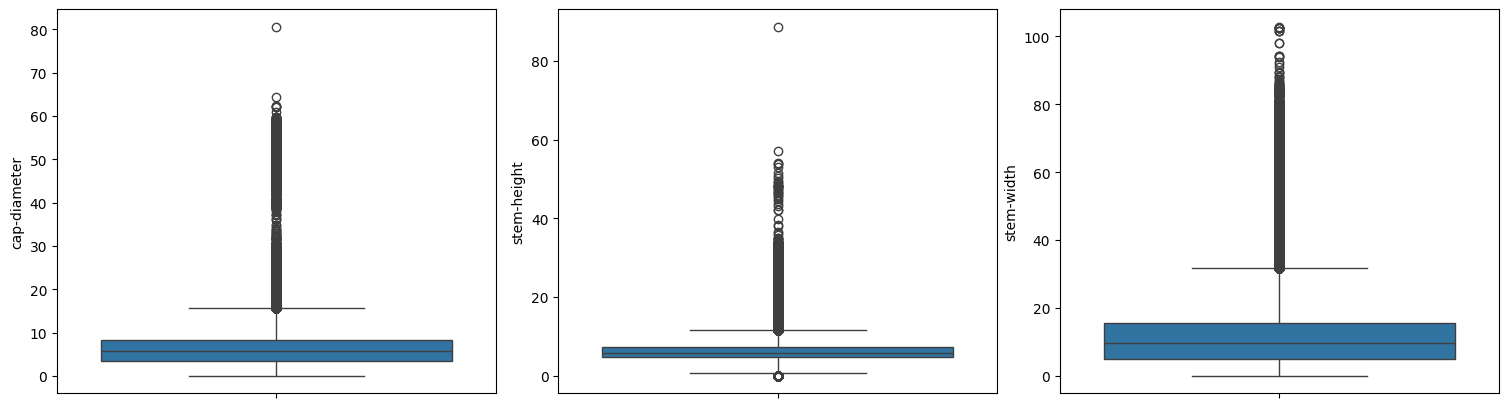

In [31]:
#Box Plot
plt.figure(dpi=200)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
index = 0
axs = axs.flatten()
for col in num_cols:
  sns.boxplot(y=col, data=train, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Test Set

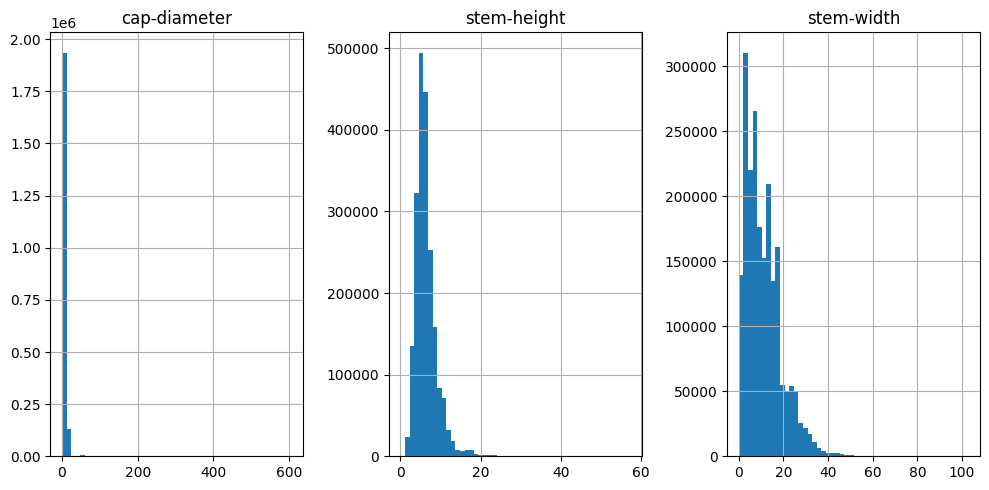

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for ax, col in zip(axes, num_cols):
    test[col].hist(bins= 50, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<Figure size 1280x960 with 0 Axes>

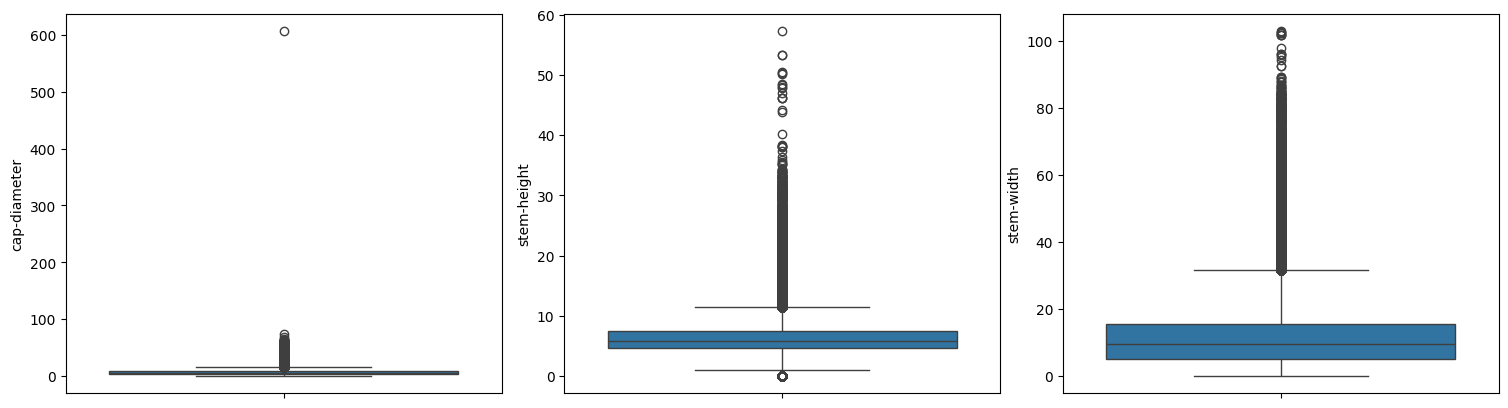

In [33]:
#Box Plot
plt.figure(dpi=200)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
index = 0
axs = axs.flatten()
for col in num_cols:
  sns.boxplot(y=col, data=test, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Skewness, Kurtosis, trim_mean

# Train set

In [34]:
# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': train[num_cols].mean(),
                                     'trimmed_mean': train[num_cols].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': train[num_cols].apply(kurtosis),
                                  'skewness': train[num_cols].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)

print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                   mean  trimmed_mean
cap-diameter   6.309848      5.809199
stem-height    6.348333      6.025546
stem-width    11.153785     10.169430

Kurtosis and Skewness:
              kurtosis  skewness
cap-diameter       NaN       NaN
stem-height   7.761535  1.926681
stem-width    2.448970  1.235426


In [35]:
train[~train['cap-diameter'].notnull()]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
707400,e,NaN,x,d,n,t,p,NaN,r,6.37,13.55,NaN,e,f,f,d,a
1946148,p,NaN,f,NaN,w,f,a,c,w,3.17,3.44,i,w,f,f,p,a
2321206,p,NaN,x,NaN,y,t,x,NaN,u,7.76,18.61,NaN,w,f,f,d,a
3041289,p,NaN,s,NaN,n,t,d,c,w,8.10,6.88,NaN,e,f,f,d,a


In [36]:
test[~test['cap-diameter'].notnull()]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
180447,NaN,x,NaN,w,f,a,NaN,r,6.42,6.70,NaN,w,f,f,d,a
243337,NaN,s,NaN,y,t,d,NaN,o,5.95,15.33,NaN,w,t,f,d,u
543673,NaN,x,y,n,t,e,NaN,p,9.24,17.89,y,w,t,l,l,a
574479,NaN,b,y,n,f,NaN,NaN,k,10.13,11.01,s,w,t,z,d,w
948069,NaN,x,NaN,n,f,e,NaN,w,11.04,14.03,NaN,w,t,g,d,u
1683760,NaN,x,NaN,w,f,NaN,c,r,3.51,12.00,NaN,y,f,f,d,a
1859866,NaN,b,y,n,f,NaN,NaN,k,16.17,17.29,NaN,w,f,f,d,a


In [37]:
#Outlier_percentage
for c, v in train[num_cols].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(train)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns cap-diameter outliers = 2.44%
columns stem-height outliers = 4.26%
columns stem-width outliers = 2.14%


# Test Set

In [38]:
# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': test[num_cols].mean(),
                                     'trimmed_mean': test[num_cols].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': test[num_cols].apply(kurtosis),
                                  'skewness': test[num_cols].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)

print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                   mean  trimmed_mean
cap-diameter   6.306192      5.802797
stem-height    6.346509      6.023292
stem-width    11.148374     10.162144

Kurtosis and Skewness:
              kurtosis  skewness
cap-diameter       NaN       NaN
stem-height        NaN       NaN
stem-width    2.567584   1.24934


In [39]:
#Outlier_percentage
for c, v in test[num_cols].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(test)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns cap-diameter outliers = 2.47%
columns stem-height outliers = 4.25%
columns stem-width outliers = 2.15%


# Impute Null Values
# Category ----> Numeric Features

In [40]:
print(f'Total Number of Null Values in Train Set: {train.isna().sum().sum()}')
print(f'Total Number of Null Values in Test Set: {test.isna().sum().sum()}')

Total Number of Null Values in Train Set: 4563879
Total Number of Null Values in Test Set: 3044534


In [41]:
def handle_missing_data(df, num_cols, cat_cols):

    numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ]
    )

    df_transformed = pd.DataFrame(preprocessor.fit_transform(df[num_cols + cat_cols]), columns=num_cols + cat_cols)
    
    print("Missing values after imputation:")
    print(df_transformed.isnull().sum())

    df_final = df[['class']].join(df_transformed)

    return df_final

In [42]:
train = handle_missing_data(train, num_cols, cat_cols)

Missing values after imputation:
cap-diameter            0
stem-height             0
stem-width              0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [43]:
def handle_missing_testset(df, num_cols, cat_cols):

    numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ]
    )

    df_transformed = pd.DataFrame(preprocessor.fit_transform(df[num_cols + cat_cols]), columns=num_cols + cat_cols)
    
    print("Missing values after imputation:")
    print(df_transformed.isnull().sum())

    df_final = df_transformed

    return df_final

In [44]:
test = handle_missing_testset(test, num_cols, cat_cols)

Missing values after imputation:
cap-diameter            0
stem-height             0
stem-width              0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


# Another look through our train and test set

In [45]:
print(f'train set shape: {train.shape}')
train.head()

train set shape: (3116945, 17)


,class,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,4.51,15.39,5.0,16.0,18.0,5.0,0.0,2.0,19.0,16.0,19.0,4.0,5.0,3.0,0.0
1,p,4.51,4.79,6.48,20.0,7.0,13.0,5.0,0.0,2.0,12.0,21.0,13.0,16.0,22.0,3.0,3.0
2,e,6.94,6.85,9.93,5.0,16.0,1.0,5.0,20.0,2.0,19.0,16.0,12.0,4.0,5.0,10.0,3.0
3,e,3.88,4.16,6.53,5.0,21.0,6.0,5.0,16.0,2.0,6.0,16.0,19.0,4.0,5.0,3.0,2.0
4,e,5.85,3.37,8.36,20.0,10.0,19.0,5.0,3.0,2.0,19.0,16.0,19.0,4.0,5.0,6.0,0.0


In [46]:
print(f'train set shape: {test.shape}')
test.head()

train set shape: (2077964, 16)


,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.64,11.13,17.12,20.0,17.0,12.0,16.0,0.0,2.0,19.0,16.0,19.0,16.0,6.0,3.0,0.0
1,6.90,1.27,10.75,13.0,17.0,13.0,4.0,0.0,2.0,21.0,16.0,12.0,5.0,5.0,3.0,0.0
2,2.00,6.18,3.14,1.0,6.0,12.0,4.0,0.0,2.0,12.0,16.0,12.0,5.0,5.0,3.0,1.0
3,3.47,4.98,8.51,20.0,17.0,12.0,4.0,16.0,2.0,12.0,16.0,19.0,16.0,22.0,3.0,2.0
4,6.17,6.73,13.70,20.0,7.0,21.0,4.0,14.0,2.0,21.0,16.0,21.0,16.0,5.0,3.0,2.0


# Splitition phase

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])

In [48]:
y = train['class'] 
X = train.drop(['class'],axis=1)

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.metrics import matthews_corrcoef

def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [54]:
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier
import gc

model = XGBClassifier(                    

    colsample_bytree=0.6,      
    max_depth=14,             
    min_child_weight=7,         
    random_state=42,                 
    n_estimators=200,
     
    )

In [55]:
XGB = model.fit(
    X_train, 
    y_train, 
    eval_set = [(X_test, y_test)],
    eval_metric = mcc_metric   
    )

c:\Users\hugph\ML\s4e8\venv\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.45920	validation_0-mcc:0.93869
[1]	validation_0-logloss:0.33348	validation_0-mcc:0.95752
[2]	validation_0-logloss:0.25550	validation_0-mcc:0.96200
[3]	validation_0-logloss:0.20263	validation_0-mcc:0.96364
[4]	validation_0-logloss:0.15975	validation_0-mcc:0.97007
[5]	validation_0-logloss:0.12680	validation_0-mcc:0.97365
[6]	validation_0-logloss:0.10706	validation_0-mcc:0.97468
[7]	validation_0-logloss:0.09036	validation_0-mcc:0.97542
[8]	validation_0-logloss:0.08019	validation_0-mcc:0.97649
[9]	validation_0-logloss:0.07078	validation_0-mcc:0.97750
[10]	validation_0-logloss:0.06356	validation_0-mcc:0.97771
[11]	validation_0-logloss:0.05984	validation_0-mcc:0.97809
[12]	validation_0-logloss:0.05551	validation_0-mcc:0.97859
[13]	validation_0-logloss:0.05193	validation_0-mcc:0.97890
[14]	validation_0-logloss:0.04977	validation_0-mcc:0.97926
[15]	validation_0-logloss:0.04726	validation_0-mcc:0.97974
[16]	validation_0-logloss:0.04592	validation_0-mcc:0.97995
[17]	va

In [56]:
y_pred = XGB.predict(X_test)

In [57]:
score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9822149793041021


In [58]:
test_pred_prob = XGB.predict(test)

In [59]:
test_pred_binary = (test_pred_prob > 0.5).astype(int)

test_pred_class = le.inverse_transform(test_pred_prob)

In [60]:
submission['class']= test_pred_class

In [61]:
submission.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e
